<a href="https://colab.research.google.com/github/YanisaThes/Pythonproject/blob/main/ML_Workshop_2025_26_Session_1_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Workshop - Session 1.2

## Step 1: Ideation
Predict the property selling price from the information of each property. Use a decision tree regressor.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import poisson, uniform

## Step 2: Data Collection

Load the melbourne dataset from Kaggle.

The columns in the dataset are:
*  Suburb
*  Address
*  Rooms: Number of rooms
*  Price: Price in Australian dollars, target variable
*  Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
*  Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
*  SellerG: Real Estate Agent
*  Date: Date sold
*  Distance: Distance from CBD in Kilometres
*  Regionname: General Region (West, North West, North, North east ...etc)
*  Propertycount: Number of properties that exist in the suburb.
*  Bedroom2 : Scraped # of Bedrooms (from different source)
*  Bathroom: Number of Bathrooms
*  Car: Number of carspots
*  Landsize: Land Size in Metres
*  BuildingArea: Building Size in Metres
*  YearBuilt: Year the house was built
*  CouncilArea: Governing council for the area
*  Lattitude
*  Longtitude

Reference:
*  This dataset is available on Kaggle: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

In [ ]:
file_path = 'melb_data.csv'
dataset = pd.read_csv(file_path)
dataset.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Step 3: Exploratory Data Analysis

Check the row count and the data type of each columns

In [ ]:
print(len(dataset))
dataset.dtypes

18396


,0
Unnamed: 0,int64
Suburb,object
Address,object
Rooms,int64
Type,object
Price,float64
Method,object
SellerG,object
Date,object
Distance,float64


Compute descriptive statistics for numerical columns

In [ ]:
dataset.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Data visualization

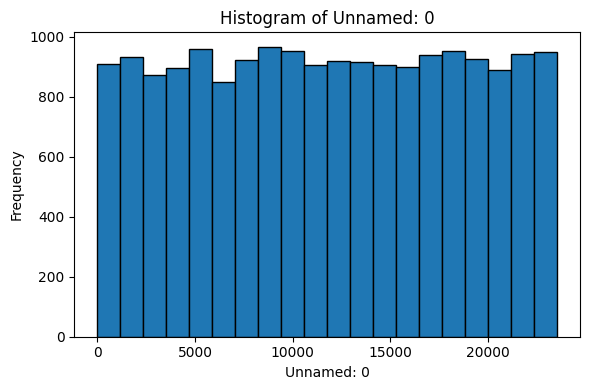

Too many categories for Suburb to visualize: 330


<Figure size 600x400 with 0 Axes>

Too many categories for Address to visualize: 18134


<Figure size 600x400 with 0 Axes>

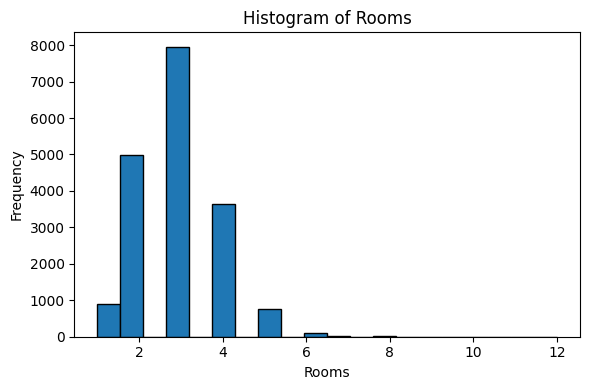

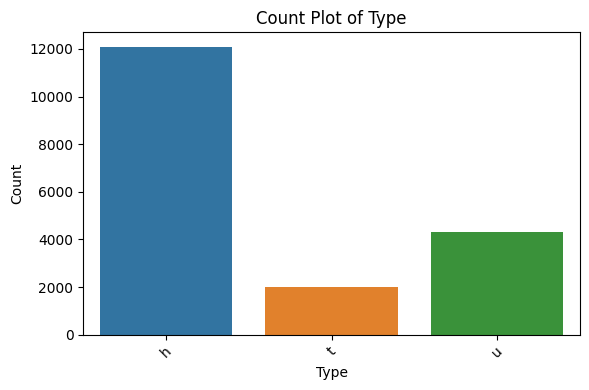

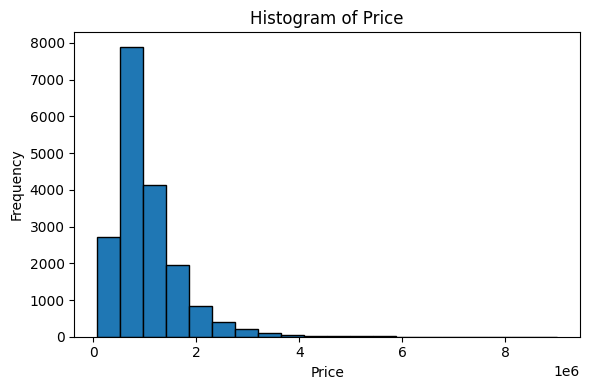

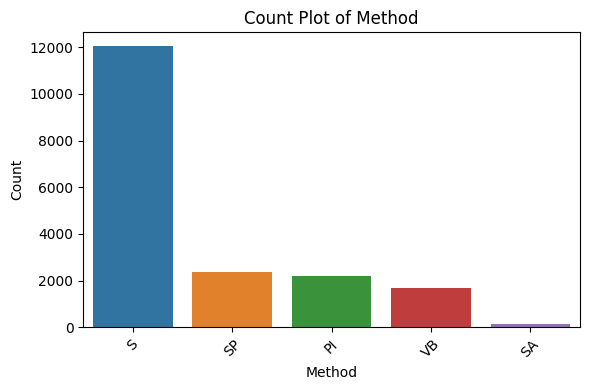

Too many categories for SellerG to visualize: 305


<Figure size 600x400 with 0 Axes>

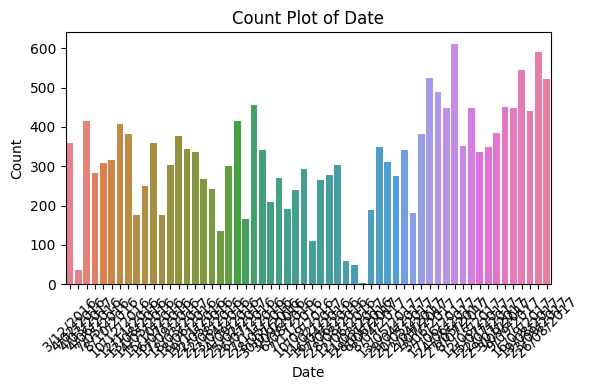

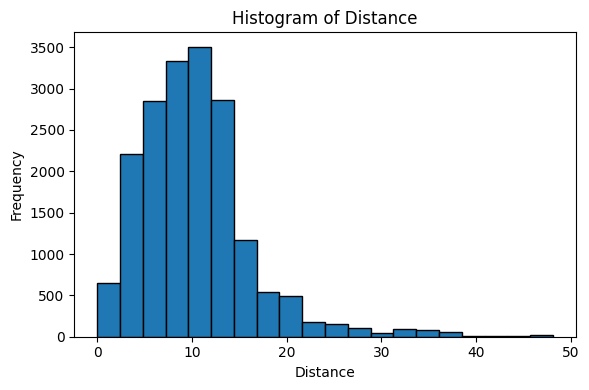

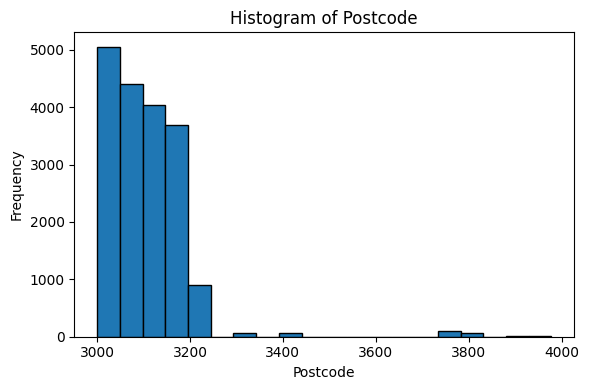

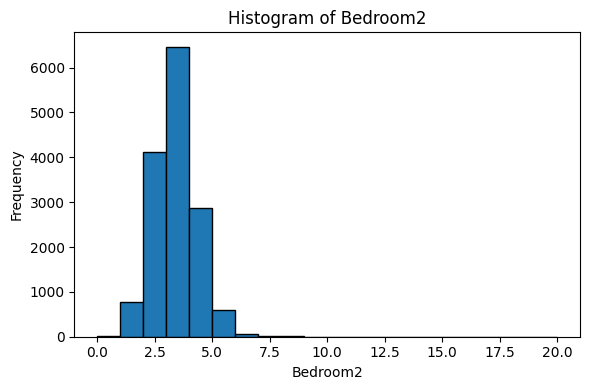

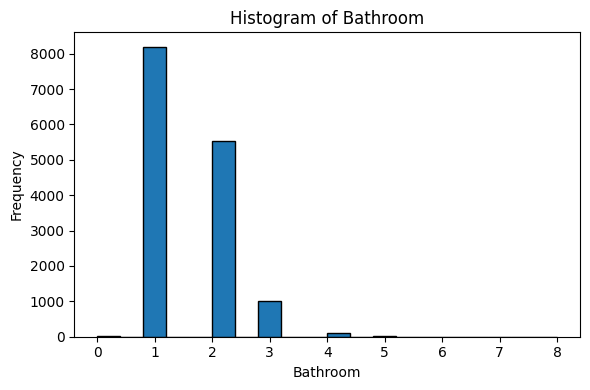

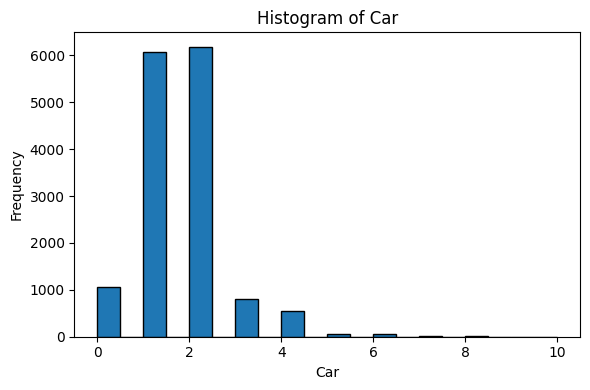

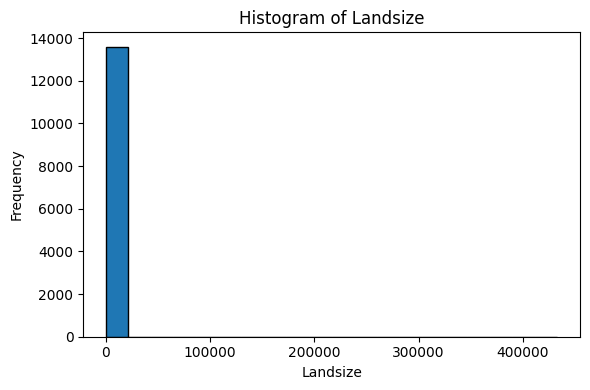

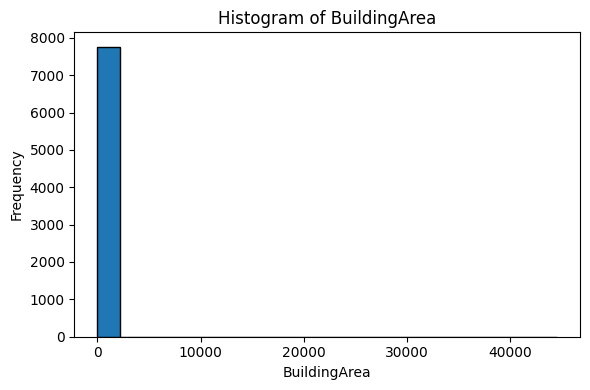

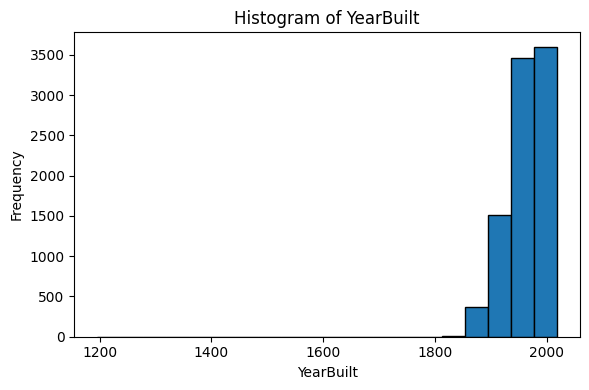

/tmp/ipython-input-176863647.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


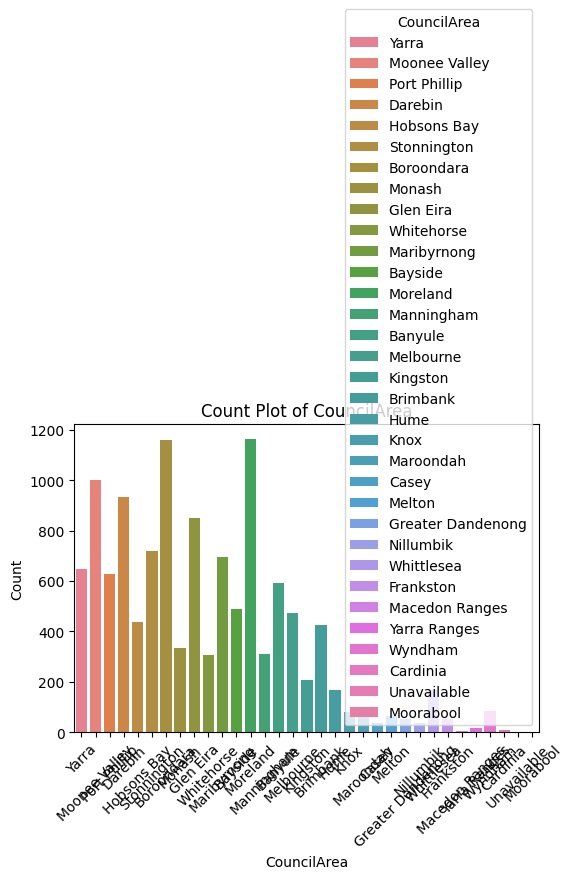

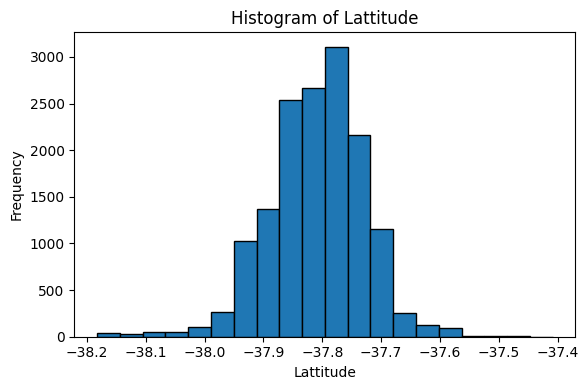

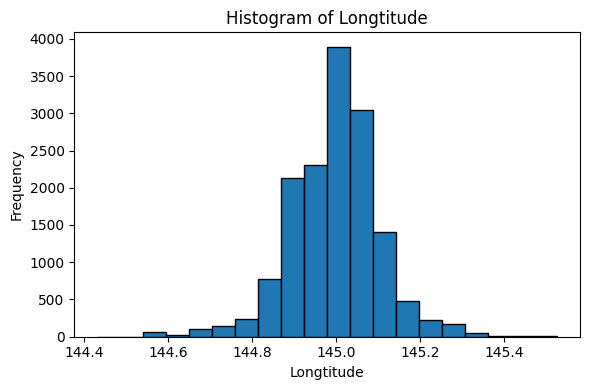

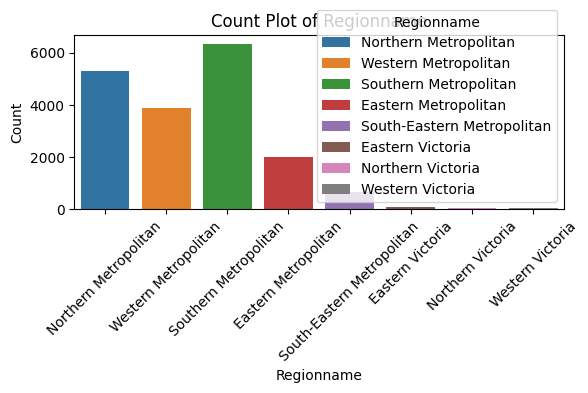

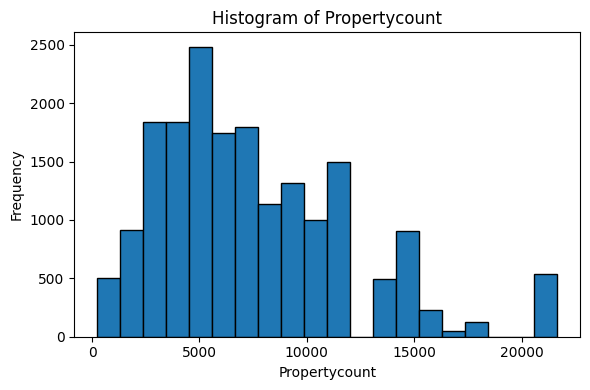

In [ ]:
# Loop through each column to visualize
for column in dataset.columns:
    plt.figure(figsize=(6, 4))

    if dataset[column].dtype in ['int64', 'float64']:  # Numerical column
        # Histogram
        plt.hist(dataset[column], bins=20, edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    else:  # Categorical column
        value_counts = dataset[column].value_counts()
        if len(value_counts) < 100:
          # Bar plot
          sns.countplot(x=column, data=dataset, hue=column)
          plt.title(f'Count Plot of {column}')
          plt.xlabel(column)
          plt.ylabel('Count')
          plt.xticks(rotation=45)
          # Pie chart
          #plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
          #plt.title(f'Pie Chart of {column}')
        else:
          print(f"Too many categories for {column} to visualize:", len(value_counts))

    # Show the plot
    plt.tight_layout()
    plt.show()

## Step 4: Data Cleansing

Handle missing or invalid data entries by omitting or imputing

In [ ]:
# Drop the rows containing some missing values
dataset_cleaned = dataset.dropna()

print('Row counts before and after dropping:', len(dataset), len(dataset_cleaned))

Row counts before and after dropping: 18396 6196


## Step 5: Feature Engineering

Select and create features (i.e. input variables)

In [ ]:
dataset_cleaned.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
features = ['Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname']
X_original = dataset_cleaned[features]

Transform non-ordinal categorical features using one-hot encoding

In [ ]:
X = pd.get_dummies(X_original, columns=['Type', 'Regionname'], drop_first=True)
X.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,False,False,False,True,False,False,False,False,False
2,3,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,False,False,False,True,False,False,False,False,False
4,4,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,False,False,False,True,False,False,False,False,False
6,3,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,False,False,False,True,False,False,False,False,False
7,2,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,False,False,False,True,False,False,False,False,False


Select or create the output variable

In [ ]:
y = dataset_cleaned['Price']

Compute descriptive statistics and visualization of the output

In [ ]:
y.describe().apply("{0:.4f}".format)

,Price
count,6196.0000
mean,1068828.2021
std,675156.4275
min,131000.0000
25%,620000.0000
50%,880000.0000
75%,1325000.0000
max,9000000.0000


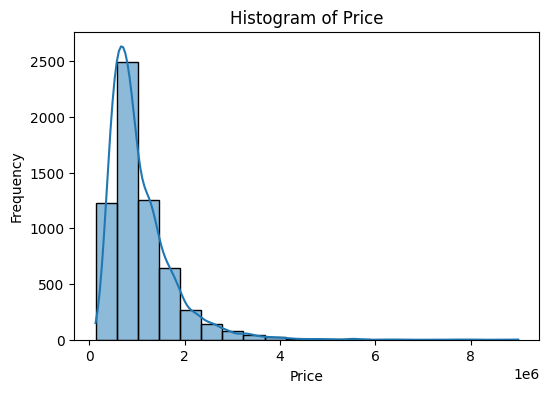

In [ ]:
# Plot y
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True, bins=20)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Split the dataset into train, validation, and test datasets

In [ ]:
# 1. First Split: Split the data into (Train + Validation) and Test
# This keeps 80% for training/validation and sets aside 20% for testing.
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# 2. Second Split: Split the (Train + Validation) part into Train and Validation
# 0.25 x 0.8 = 0.2. This ensures the validation set is 20% of the *total* data.
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=0
)

# Check the shapes (Optional)
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

Train size: 3717
Validation size: 1239
Test size: 1240


## Step 6: Modeling

Build and train a decision-tree regressor using some initial hyperparameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

# Define model
model = DecisionTreeRegressor(criterion="squared_error", max_depth=5)
# Fit model
model.fit(X_train, y_train)

train_R2 = model.score(X_train, y_train)
print(train_R2)

0.7280123846872


## Step 7: Performance Evaluation and Tuning

Measure and report performance of the model on the test set

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

R^2: 0.6011937633246813
Mean Squared Error (MSE): 217115134950.09247
Mean Absolute Error (MAE): 269548.93356466416


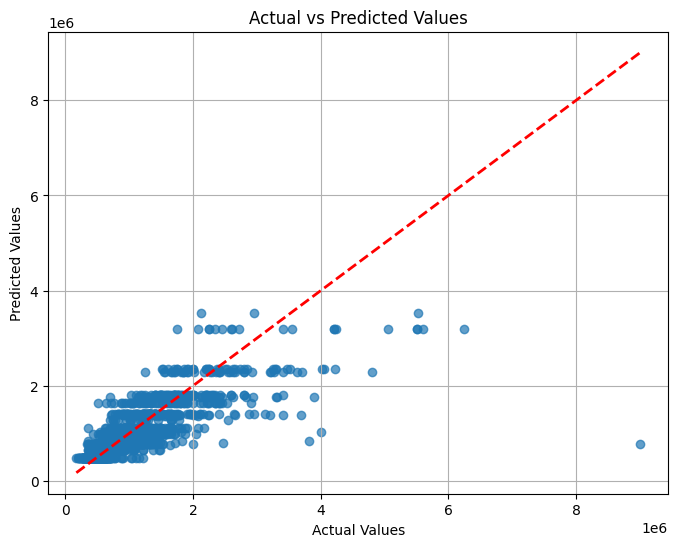

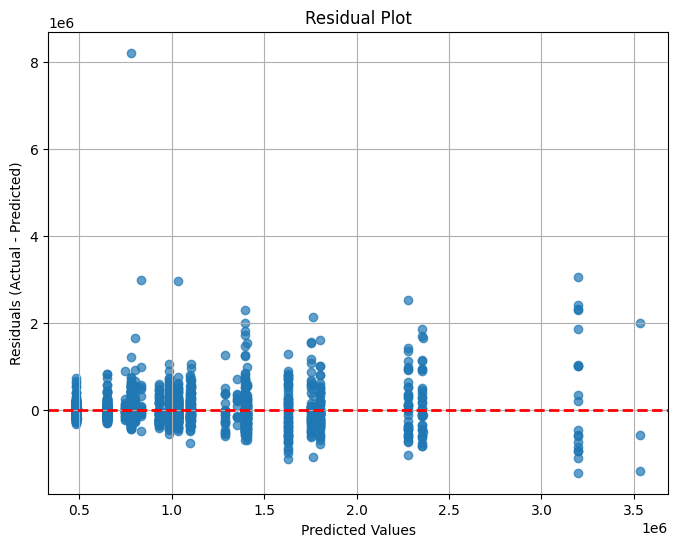

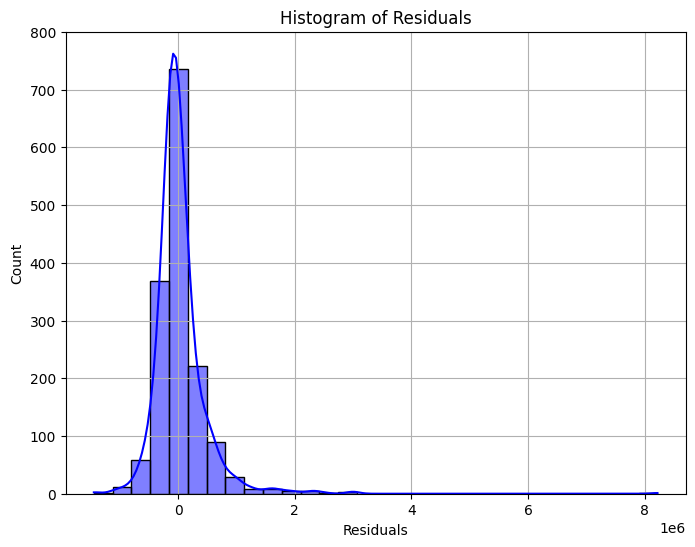

In [ ]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--', lw=2)  # Horizontal line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()

Perform hyperparameter tuning using grid search

In [ ]:
# setup parameter space
parameters = {'max_depth':np.arange(4,21).tolist()[0::2],
              'min_samples_split':np.arange(2,31).tolist()[0::2]}

# create an instance of the grid search object
model_tuner = GridSearchCV(DecisionTreeRegressor(), parameters, scoring='r2', n_jobs=-1)

# conduct search over the parameter space
model_tuner.fit(X_val,y_val)

# show best parameter configuration found for classifier
parameters_optimal = model_tuner.best_params_
print(parameters_optimal )

# compute performance on test set
model_optimal = model_tuner.best_estimator_
y_pred = model_optimal.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

{'max_depth': 8, 'min_samples_split': 6}
R^2: 0.593419896683993
Mean Squared Error (MSE): 221347325797.57715
Mean Absolute Error (MAE): 261290.6642431104


Perform hyperparameter tuning using randomized search

In [ ]:
# setup parameter space
parameters = {'max_depth':poisson(mu=2,loc=2),
              'min_samples_split':uniform() }

# create an instance of the randomized search object
model_tuner = RandomizedSearchCV(DecisionTreeRegressor(), parameters,
                                 scoring='r2', n_iter=100, n_jobs=-1)

# conduct search over the parameter space
model_tuner.fit(X_val,y_val)

# show best parameter configuration found for classifier
parameters_optimal = model_tuner.best_params_
print(parameters_optimal)

# compute performance on test set
model_optimal = model_tuner.best_estimator_
y_pred = model_optimal.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

{'max_depth': 5, 'min_samples_split': np.float64(0.06436264455539786)}
R^2: 0.5585866510571043
Mean Squared Error (MSE): 240310983156.79944
Mean Absolute Error (MAE): 278904.76670806087


## Step 8: Interpretation and Conclusion

Interpret the optimized model as a decision tree

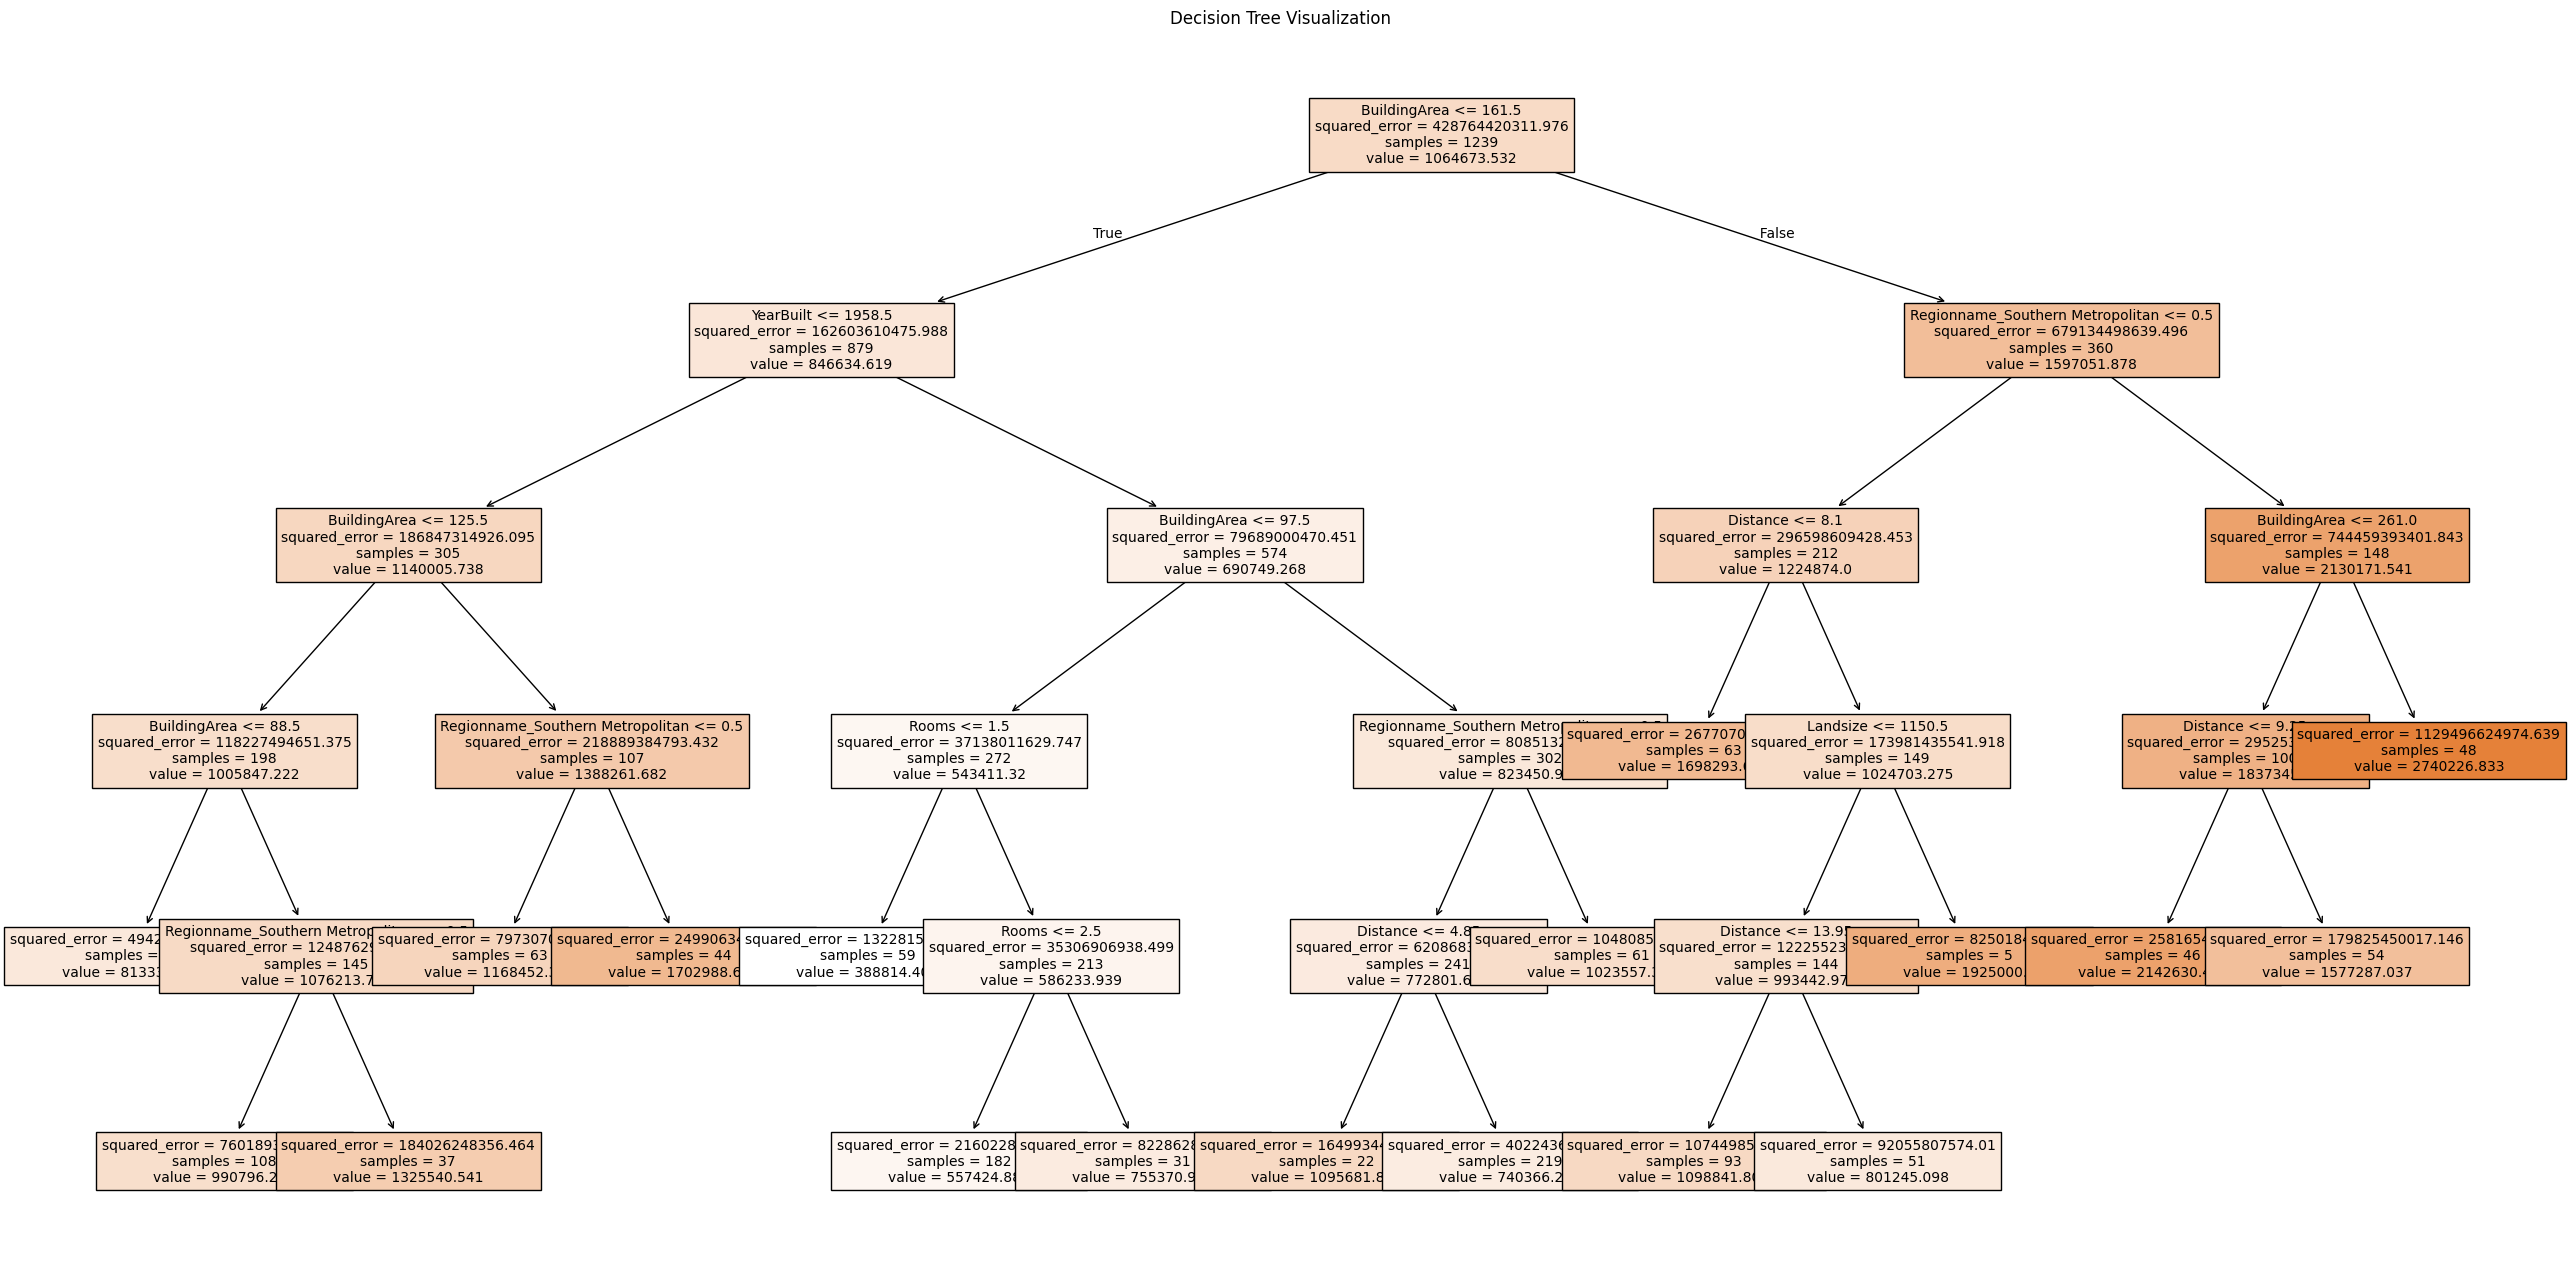

In [ ]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(32, 16))
plot_tree(model_optimal,
          feature_names=X.columns,
          class_names={True:"Yes", False:"No"},
          filled=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

Calculate and summarize the importance scores of features

Feature Importance:
                             Feature  Importance
6                       BuildingArea    0.539781
14  Regionname_Southern Metropolitan    0.236054
7                          YearBuilt    0.111661
1                           Distance    0.092972
5                           Landsize    0.011648
0                              Rooms    0.007885
4                                Car    0.000000
2                           Bedroom2    0.000000
3                           Bathroom    0.000000
8                             Type_t    0.000000


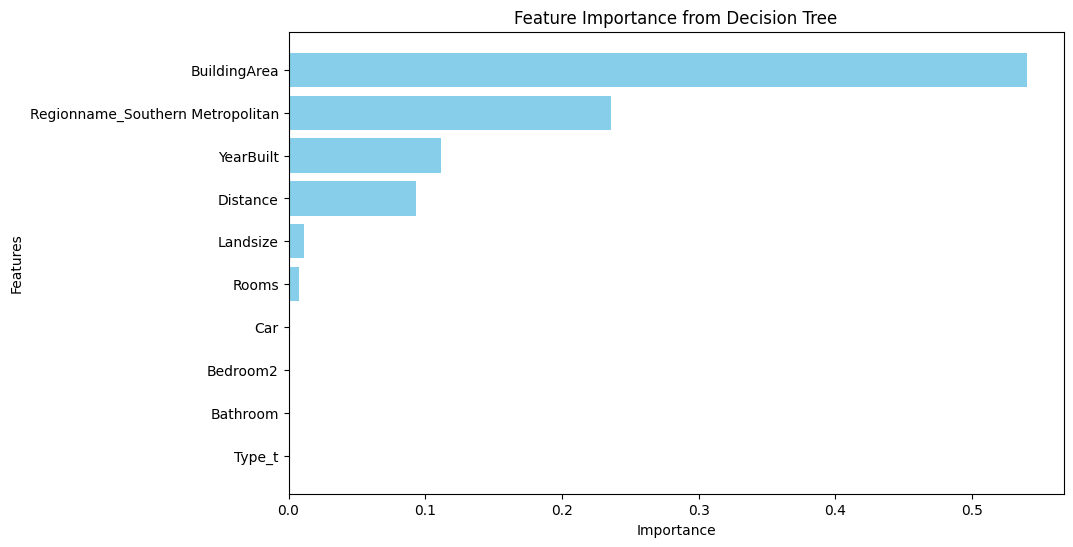

In [ ]:
# Get feature importance
feature_importance = model_optimal.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,  # Replace with your feature names
    'Importance': feature_importance
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df[:10]

print("Feature Importance:")
print(importance_df)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Decision Tree")
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature on top
plt.show()

**Conclusion:**
We have demonstrated the use of a decision tree regressor to predict property selling prices in Melbourne using the Melbourne Housing dataset.

We performed data preprocessing, including handling missing values by omitting rows with missing data and manually selecting relevant features. We transformed categorical features using one-hot encoding to prepare them for the model.

The dataset was split into training and testing sets (75:25 ratio). An initial decision tree regressor was trained, achieving a high training R^2 score. However, the test R^2 score was lower, suggesting potential overfitting.

Hyperparameter tuning was performed using both grid search and randomized search to improve model performance. The optimized model showed an improved R^2 score on the test set, indicating better generalization.

Feature importance analysis revealed that 'BuildingArea', 'Regionname', 'YearBuilt', 'Landsize', and 'Distance' were the top-5 most influential predictors of property prices.

In conclusion, the decision tree regressor proved to be a useful tool for predicting property prices in Melbourne. Further improvements could be explored, such as using different regression algorithms or incorporating more features. The insights gained from this analysis can be valuable for real estate professionals and property buyers in making informed decisions.